In [1]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 511.5, 511.5, -0.5)

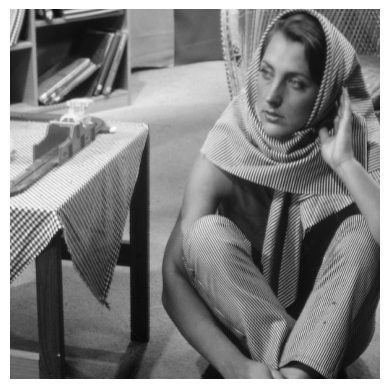

In [2]:
case = 9
i = 0
r = 35
img = imageio.imread(f'Dataset/in/0{case}.png')
plt.imshow(img, cmap="gray")
plt.axis('off')

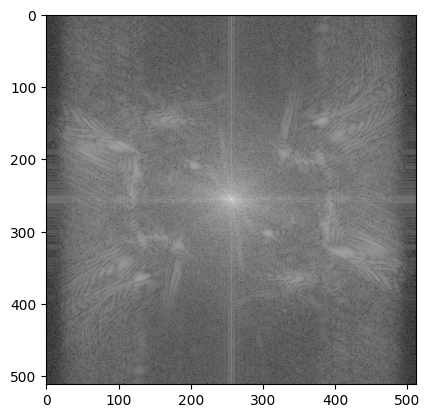

In [3]:
def get_fft(img):
    return np.fft.fftshift(np.fft.fft2(img))

F = get_fft(img)
plt.imshow(np.log(1+np.abs(F)), cmap="gray")

In [4]:
P, Q = F.shape
print(f'P: {P}')
print(f'Q: {Q}')

P: 512
Q: 512


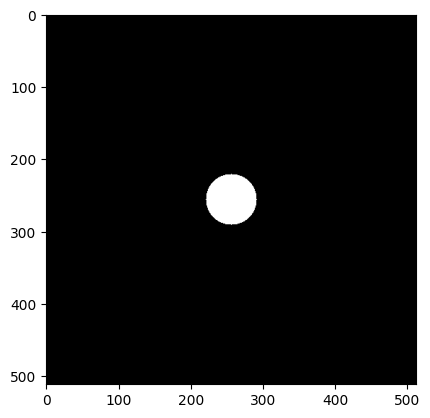

In [5]:
def distance(u, v, P, Q):
    return np.sqrt((u-P/2)**2 + (v-Q/2)**2)

def low_pass(u, v, P, Q, r):
    if distance(u, v, P, Q) <= r:
        return 1
    else:
        return 0

def high_pass(u, v, P, Q, r):
    if distance(u, v, P, Q) <= r:
        return 0
    else:
        return 1
        
def get_filter(P, Q, filter_func, *args):
    filter = np.zeros((P, Q), dtype=np.float32)
    
    for u in range(P):
        for v in range(Q):
            filter[u, v] = filter_func(u, v, P, Q, *args)
            
    return filter

match i:
    case 0:
        filter = get_filter(P, Q, low_pass, r)
    case 1:
        filter = get_filter(P, Q, high_pass, r)
        
plt.imshow(filter, cmap="gray")

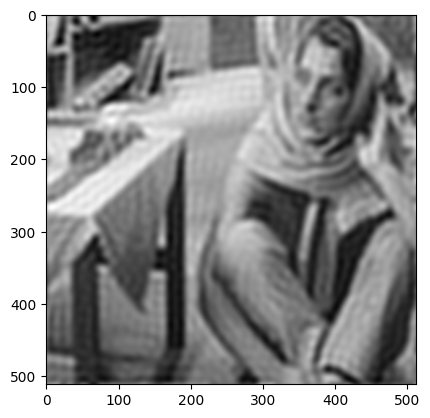

In [6]:
#img_filtered = np.clip(img_filtered.real, 0, 255)

def normalize(img):
    return (img - img.min()) / (img.max() - img.min())

def apply_filter(F, filter):
    F_filtered = np.multiply(F, filter)
    img_filtered = np.fft.ifft2(np.fft.ifftshift(F_filtered)).real
    img_filtered = normalize(img_filtered) * 255
    return img_filtered

img_filtered = apply_filter(F, filter)
plt.imshow(img_filtered, cmap="gray")

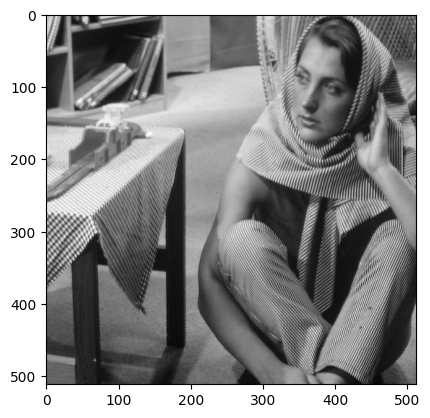

In [7]:
expected = imageio.imread(f'Dataset/gt/0{case}.png')
plt.imshow(expected, cmap="gray")

In [8]:
def root_mean_squared_error(reference_img, enhanced_img):
  """
  Computes then returns the Root Mean Squared Error (RMSE) between the reference image and the enhanced image.
  """
  M, N = reference_img.shape

  sum = 0
  for i in range(M):
    for j in range(N):
      sum += (reference_img[i][j] - enhanced_img[i][j])**2

  error = np.sqrt(sum/(M*N))

  return error

In [9]:
root_mean_squared_error(expected, img_filtered)

20.30126269150691